## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
import numpy as np

**What is the no. of elements in the training and testing datasets?**

In [ ]:
#ENTER YOUR CODE HERE
X_train.shape[0],X_test.shape[0]

(60000, 10000)

**What are the labels in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualise one image for each label.**

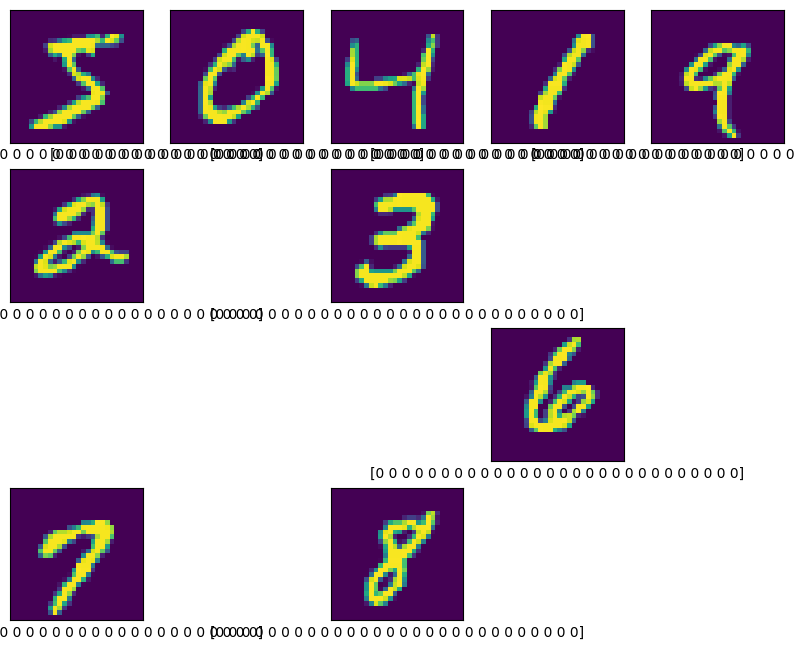

In [ ]:
#ENTER YOUR CODE HERE
list1=np.unique(y_train)
index1=[]
for i in list1:
  index1.append(np.where(y_train==i)[0][0])
plt.figure(figsize=(10,10))
for i in index1:
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(list1[X_train[i][0]])
plt.show()

**One-hot encode the y labels.**

In [ ]:
#ENTER YOUR CODE HERE
y_train_onehot=np.eye(10)[y_train]
y_test_onehot=np.eye(10)[y_test]

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

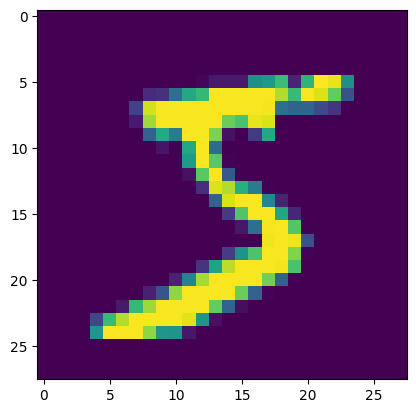

In [ ]:
#ENTER YOUR CODE HERE
plt.imshow(X_train[0])
X_train

**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [ ]:
#ENTER YOUR CODE HERE
X_train=X_train.reshape(60000, 28, 28, 1)
X_test=X_test.reshape(10000, 28, 28, 1)
y_train=y_train.reshape(60000,1)
y_test=y_test.reshape(10000,1)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [ ]:
#ENTER YOUR CODE HERE
X_train=X_train/255
X_test=X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [ ]:
model=Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [ ]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Fit the model and plot the training history.**

In [ ]:
#ENTER YOUR CODE HERE
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9112 - loss: 0.2855 - val_accuracy: 0.9797 - val_loss: 0.0614
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9875 - loss: 0.0431 - val_accuracy: 0.9866 - val_loss: 0.0395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9894 - val_loss: 0.0312
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9956 - loss: 0.0131 - val_accuracy: 0.9904 - val_loss: 0.0297
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9969 - loss: 0.0106 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9967 - loss: 0.0097 - val_accuracy: 0.9906 - val_loss: 0.0330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9978 - loss: 0.00

**Now test your model on the training dataset and print the classification matrix.**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


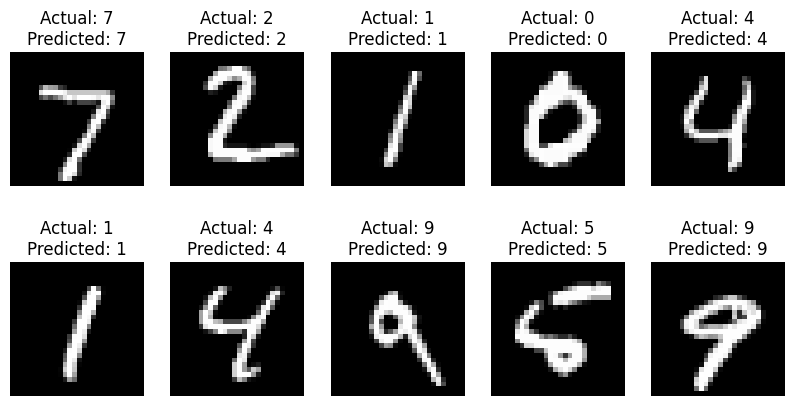

In [ ]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')